In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
data = pd.read_excel("data.xlsx",header=6,usecols="B,E,F",nrows=29).dropna()

In [4]:
data

,Thickness (mm),Count rate,Corrected Rate
0,0.000000,8.855556,8.574444
2,1.110000,1.208333,0.927222
4,2.226667,1.150000,0.868889
6,3.333333,1.037500,0.756389
8,4.366667,1.145833,0.864722
10,5.416667,0.916667,0.635556
12,5.326667,0.841667,0.560556
14,6.436667,0.850000,0.568889
16,7.553333,0.791667,0.510556
18,8.660000,0.829167,0.548056


In [5]:
thick = np.array(data["Thickness (mm)"][1:])
count_rate = np.array(data["Count rate"][1:])
corrected_rate = np.array(data["Corrected Rate"][1:])

In [6]:
def f(x,a,b):
    return a*x+b    

In [7]:
param,paramcov = curve_fit(f, thick, np.log(count_rate))
print(param)
x = np.linspace(thick[0],thick[-1],1000)
y = f(x, *param)
perr = np.sqrt(np.diag(paramcov))
perr

[-0.06162765  0.26305147]


array([0.00573457, 0.04548936])

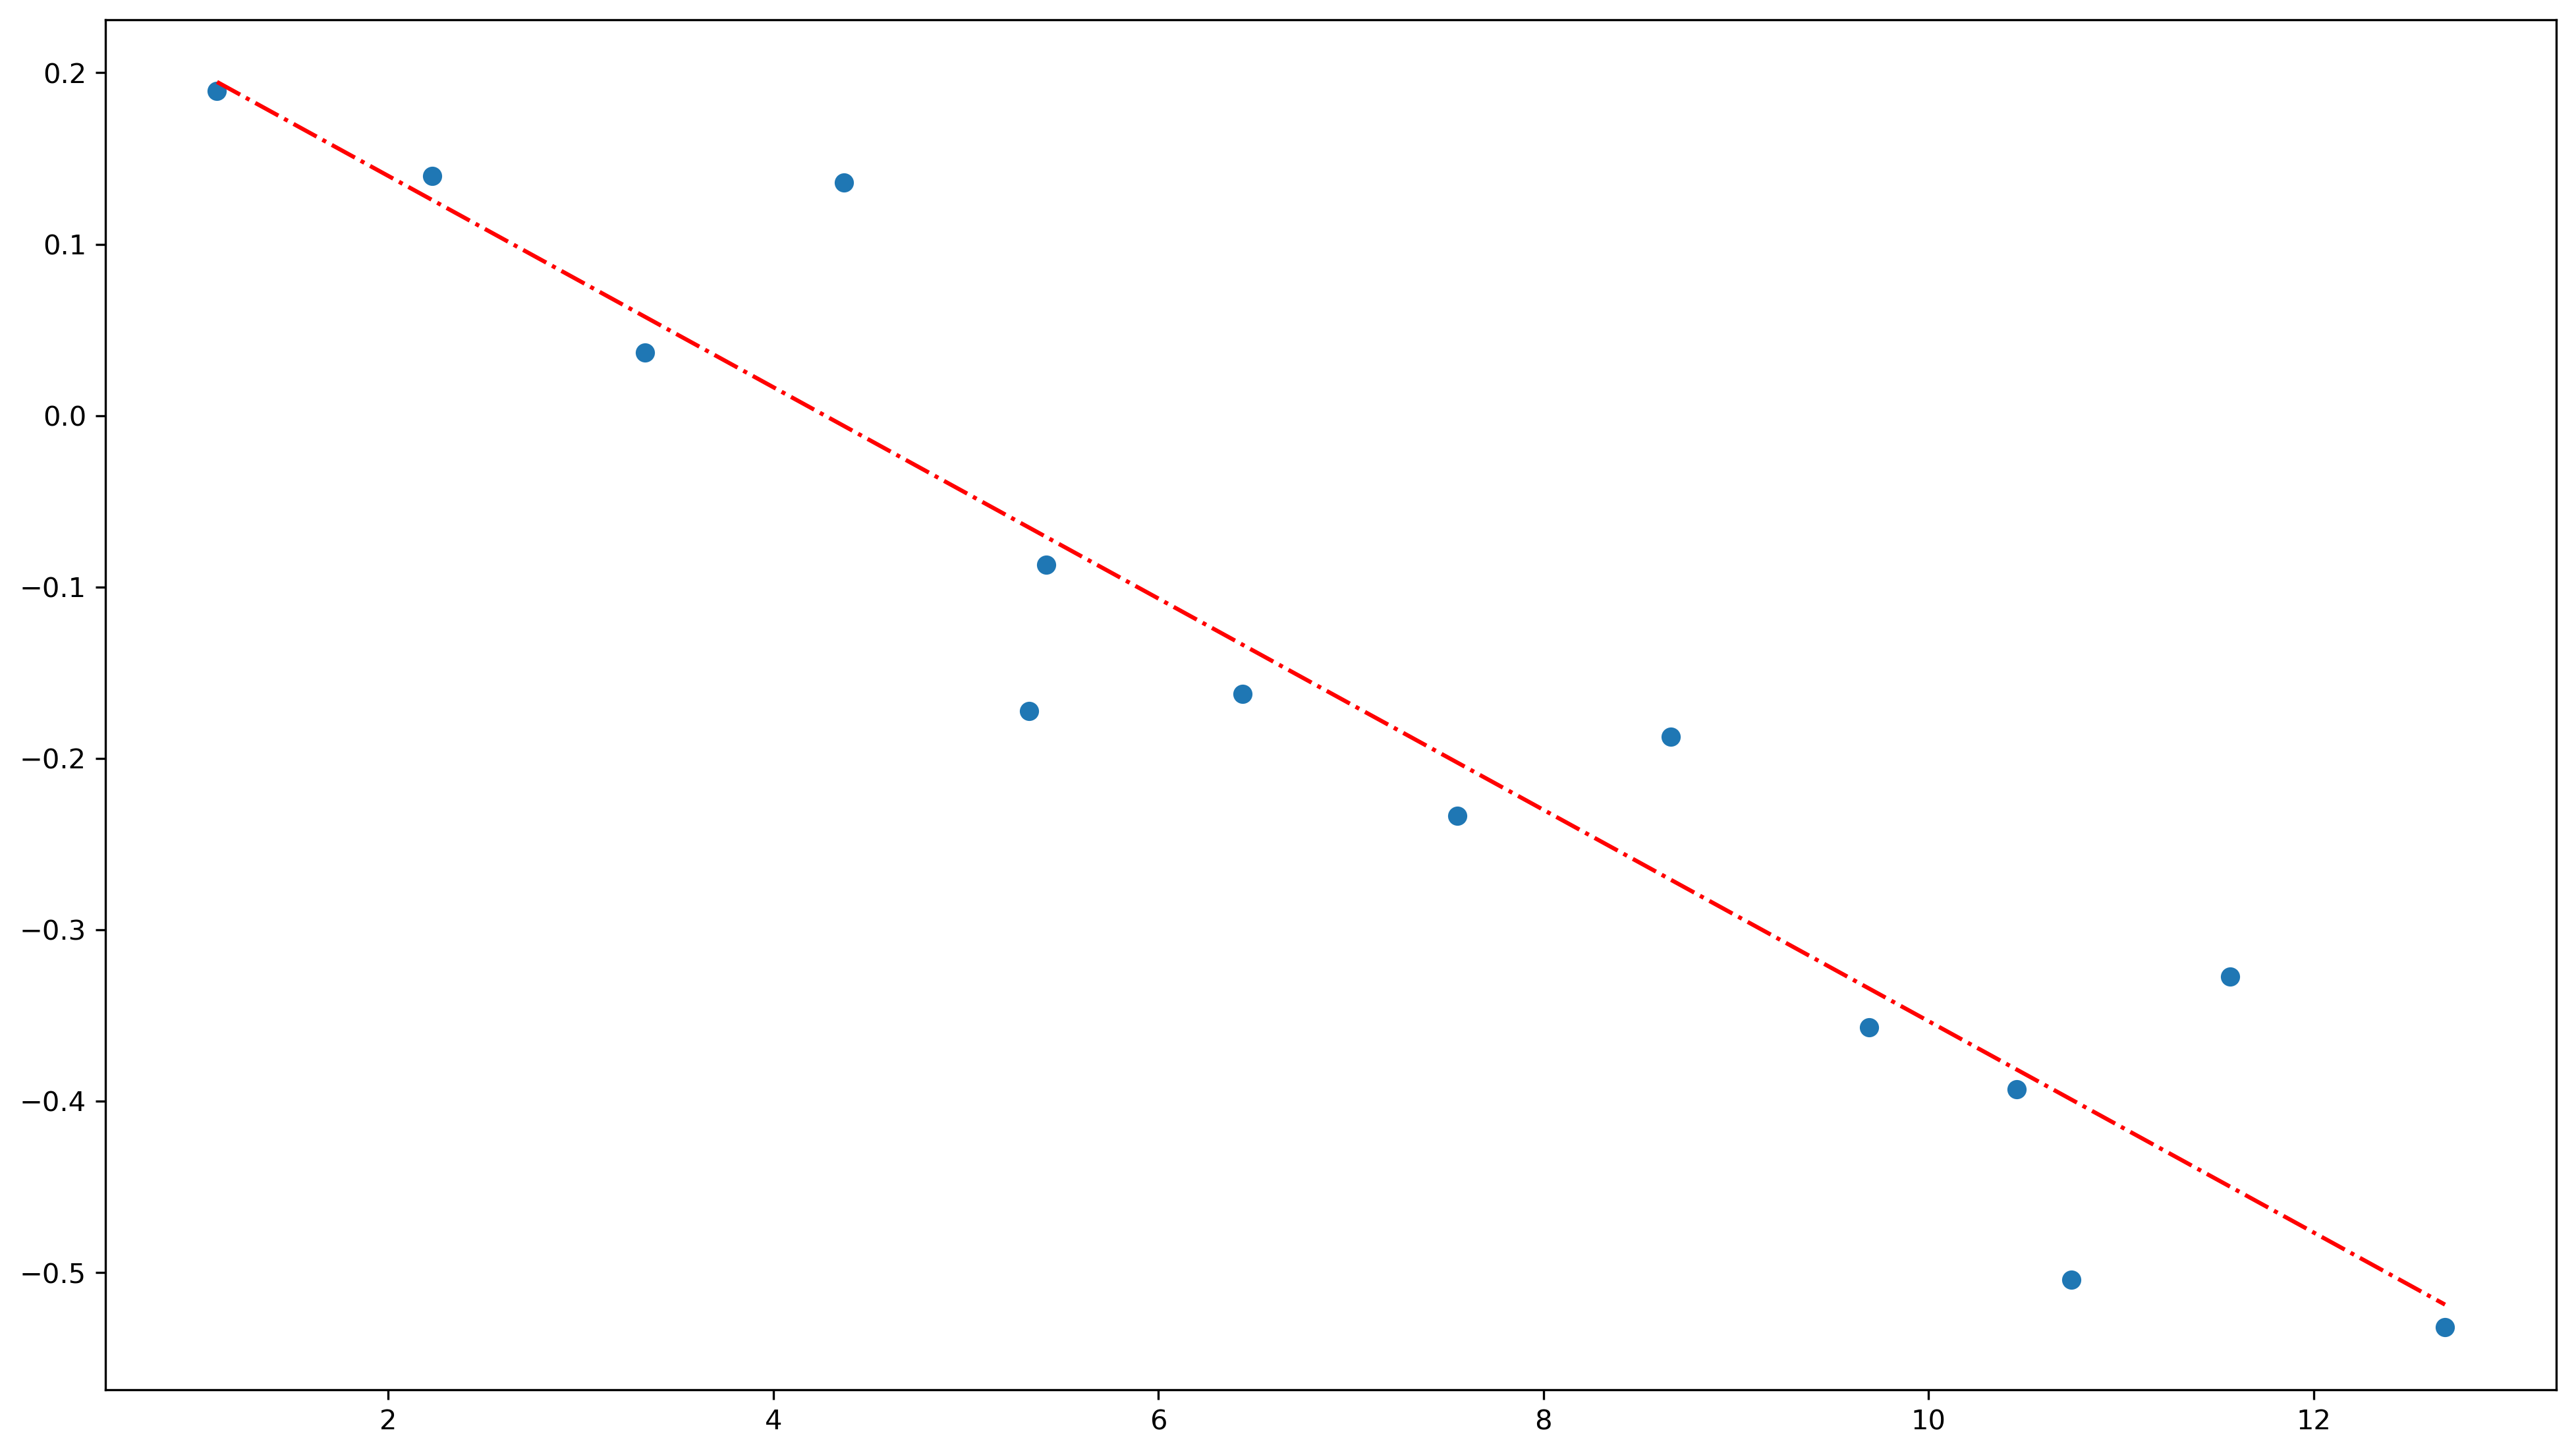

In [8]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x,y,'r-.')
axes.scatter(thick, np.log(count_rate))

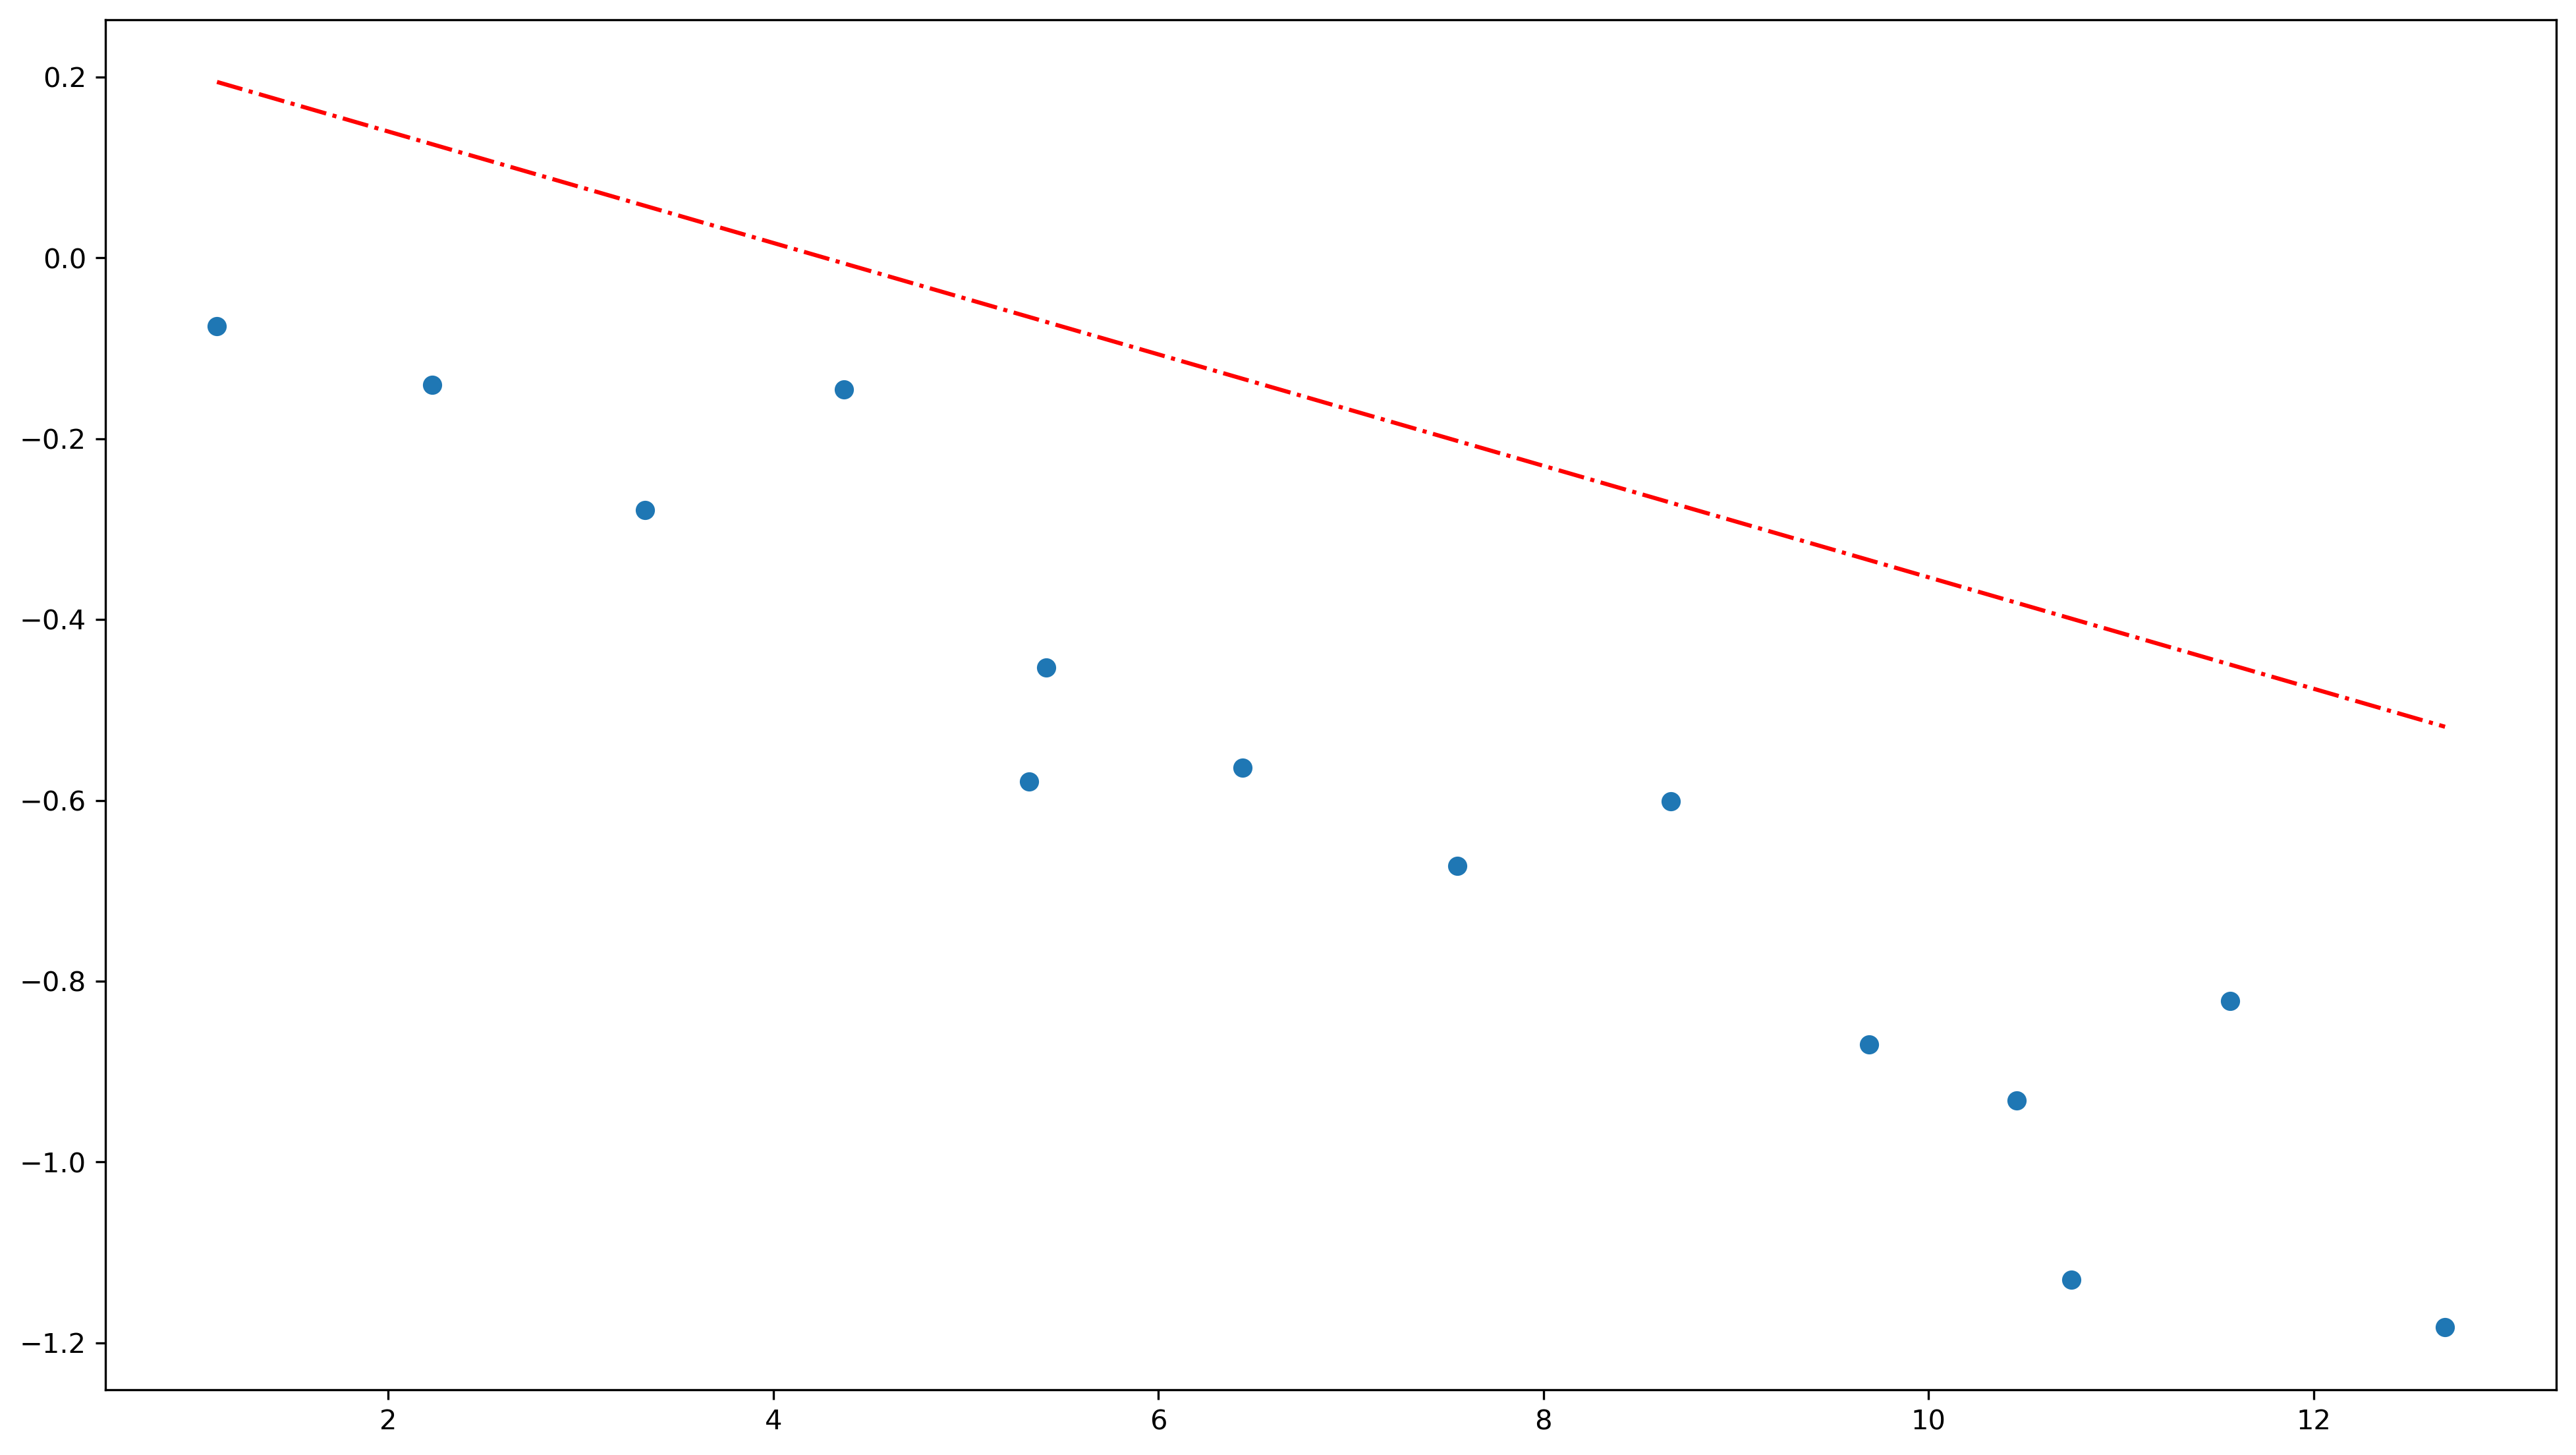

In [9]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x,y,'r-.')
axes.scatter(thick, np.log(corrected_rate))